In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [9]:
df  = pd.read_csv("train.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df = np.array(df)
m , n = df.shape
np.random.shuffle(df)
df_dev = df[0:1000].T
x_dev = df_dev[1:n]
x_dev = x_dev/255
y_dev = df_dev[0]

df_train = df[1000:m].T
x_train = df_train[1:n]
x_train = x_train/255
m_train = x_train.shape[1]
y_train = df_train[0]

In [11]:
x_train.shape

(784, 41000)

In [12]:
def in_params():
    w1 = np.random.rand(10,784) - 0.5
    b1 = np.random.rand(10,1) - 0.5
    w2 = np.random.rand(10,10) - 0.5
    b2 = np.random.rand(10,1) - 0.5

    return w1 , b1 , w2 , b2
def ReLu(x):
    return np.maximum(x,0)
def softmax(x):
    a =  np.exp(x)/sum(np.exp(x))
    return a
def forward_prop(w1,b1,w2,b2,x):
    Z1 = w1.dot(x)+b1
    A1 = ReLu(Z1)
    Z2 = w2.dot(A1)+b2
    A2 = softmax(Z2)
    return Z1 , A1 , Z2 , A2
def one_hot(y):
    one_hot_y = np.zeros((y.size , y.max()+1))
    one_hot_y[np.arange(y.size),y] = 1
    one_hot_y = one_hot_y.T
    return one_hot_y
def der_relu(x):
    return x>0
def backward_prop(z1,a1,z2,a2,w2,x,y):
    m = y.size
    one_hot_y = one_hot(y)
    dz2 = a2 - one_hot_y
    dw2 = (1 / m) * dz2.dot(a1.T)
    db2 = (1 / m) * np.sum(dz2)
    dz1 = w2.T.dot(dz2) * der_relu(z1)
    dw1 = (1 / m) * dz1.dot(x.T)
    db1 = (1 / m) * np.sum(dz1)
    return dw1 , db1 , dw2 , db2
def update(w1,b1,w2,b2,dw1,db1,dw2,db2,alp):
    w1 = w1 - alp*dw1
    w2 = w2 - alp*dw2
    b1 = b1 - alp*db1
    b2 = b2 - alp*db2
    return w1 , b1 , w2, b2

In [13]:
def get_predictions(a2):
    return np.argmax(a2,0)
def get_accuracy(predictions,y):
    print(predictions,y)
    return np.sum(predictions==y)/y.size
def gradient_des(x,y,itera,alp):
    w1 , b1 , w2 , b2 = in_params()
    for i in range(itera):
        z1 , a1 , z2 , a2 = forward_prop(w1,b1,w2,b2,x)
        dw1 , db1 , dw2 , db2 = backward_prop(z1,a1,z2,a2,w2,x,y)
        w1 , b1 , w2 , b2 = update(w1,b1,w2,b2,dw1,db1,dw2,db2,alp)
        if i%100==0:
            print("Iterations: ",i)
            print("Accuracy: ",get_accuracy(get_predictions(a2) , y))
    return w1,b1,w2,b2

In [14]:
w1 , b1 , w2 , b2 = gradient_des(x_train,y_train,itera = 200,alp = 0.1)

Iterations:  0
[8 5 8 ... 2 7 9] [3 6 7 ... 5 8 4]
Accuracy:  0.12363414634146341
Iterations:  100
[5 6 5 ... 3 8 9] [3 6 7 ... 5 8 4]
Accuracy:  0.6569756097560976


In [15]:
def make_pred(x,w1,b1,w2,b2):
    z1,a1,z2,a2 = forward_prop(w1,b1,w2,b2,x)
    predictions = get_predictions(a2)
    return predictions
def test_pred(ind , w1,b1,w2,b2):
    curr_img = x_train[:,ind,None]
    prediction = make_pred(curr_img,w1,b1,w2,b2)
    label = y_train[ind]
    print("Prediction: ",prediction)
    print("Label",label)
    
    curr_img = curr_img.reshape((28,28))*255
    plt.gray()
    plt.imshow(curr_img,interpolation = "nearest")
    plt.show()

Prediction:  [5]
Label 7


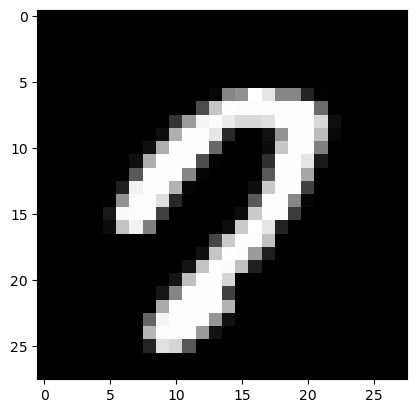

In [22]:
test_pred(2,w1,b1,w2,b2)

In [ ]:
df_test = pd.read_csv("test.csv")
df_test = df_test.T
df_test = df_test/255
test_prediction = make_pred(df_test,w1,b1,w2,b2)


In [ ]:
test_prediction

In [ ]:
submi = pd.DataFrame({'ImageId':range(1,len(test_prediction)+1) , 'Label':test_prediction})
submi.to_csv('submission2.csv', index=False)
